<a href="https://colab.research.google.com/github/Tanmay077/Airquality/blob/master/Source_emission_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shared by Tanmay with kllear@rams on 2019 Dec 16


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [0]:
import pandas as pd


In [0]:
url = 'https://raw.githubusercontent.com/Tanmay077/Airquality/master/DR.Lear_email_data.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

### Experiment 1 : Without feature reduction

In [48]:
df.head()
# We have selected theses features inorder to replicate the exact source emission rate function. since log and exponenetial are exactly oposite operations the equation remains same. P.S: I havee not selected 
# Log transformation is a part of feature engineering:- It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
#It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.
# Receptor locations because they remain constant throught the complete data set and does act as a feature in this problem. 


,Receptor_measurement1,Receptor1_Log,Receptor_measurement2,Receptor2_Log,Receptor_measurement3,Receptor_measurement4,Receptor4_Log,Receptor_measurement5,Wind_speed,Wind_speed_reci,Wind_speed_sqr_reci,Wind_speed_sqr_log,Source_Location_X,Source_Location_Y,Log
0,0.002519,-5.197509,0.001176,-5.859333,0.021763,0.000738,-6.26,0.000006,12,0.083333,144.000001,2.158362,100,100,-2.142782
1,0.002269,-5.288408,0.001059,-5.950290,0.019601,0.000665,-6.35,0.000005,9,0.111111,81.000000,1.908485,100,100,-2.438112
2,0.003139,-5.006417,0.001465,-5.668265,0.027118,0.000920,-6.07,0.000007,14,0.071429,196.000002,2.292256,100,100,-1.913355
3,0.042448,-2.744286,0.019812,-3.406143,0.366710,0.012440,-3.81,0.000101,4,0.250000,16.000000,1.204120,100,100,-1.870407
4,0.003803,-4.839679,0.001775,-5.501554,0.032858,0.001115,-5.91,0.000009,10,0.100000,100.000000,2.000000,100,100,-2.122231


In [49]:
df.dtypes

Receptor_measurement1    float64
Receptor1_Log            float64
Receptor_measurement2    float64
Receptor2_Log            float64
Receptor_measurement3    float64
Receptor_measurement4    float64
Receptor4_Log            float64
Receptor_measurement5    float64
Wind_speed                 int64
Wind_speed_reci          float64
Wind_speed_sqr_reci      float64
Wind_speed_sqr_log       float64
Source_Location_X          int64
Source_Location_Y          int64
Log                      float64
dtype: object

In [0]:
import sklearn

In [0]:
from sklearn.linear_model import LinearRegression


In [52]:
df.head(10)

,Receptor_measurement1,Receptor1_Log,Receptor_measurement2,Receptor2_Log,Receptor_measurement3,Receptor_measurement4,Receptor4_Log,Receptor_measurement5,Wind_speed,Wind_speed_reci,Wind_speed_sqr_reci,Wind_speed_sqr_log,Source_Location_X,Source_Location_Y,Log
0,0.002519,-5.197509,0.001176,-5.859333,0.021763,0.000738,-6.26,0.000006,12,0.083333,144.000001,2.158362,100,100,-2.142782
1,0.002269,-5.288408,0.001059,-5.950290,0.019601,0.000665,-6.35,0.000005,9,0.111111,81.000000,1.908485,100,100,-2.438112
2,0.003139,-5.006417,0.001465,-5.668265,0.027118,0.000920,-6.07,0.000007,14,0.071429,196.000002,2.292256,100,100,-1.913355
3,0.042448,-2.744286,0.019812,-3.406143,0.366710,0.012440,-3.81,0.000101,4,0.250000,16.000000,1.204120,100,100,-1.870407
4,0.003803,-4.839679,0.001775,-5.501554,0.032858,0.001115,-5.91,0.000009,10,0.100000,100.000000,2.000000,100,100,-2.122231
5,0.001636,-5.572540,0.000764,-6.234371,0.014132,0.000479,-6.64,0.000004,13,0.076923,169.000000,2.227887,100,100,-2.260760
6,0.002505,-5.202419,0.001169,-5.864297,0.021640,0.000734,-6.27,0.000006,17,0.058824,289.000004,2.460898,100,100,-1.842694
7,0.003059,-5.028926,0.001428,-5.690787,0.026425,0.000896,-6.09,0.000007,16,0.062500,256.000000,2.408240,100,100,-1.808605
8,0.006392,-4.388713,0.002983,-5.050577,0.055223,0.001873,-5.45,0.000015,11,0.090909,121.000000,2.082785,100,100,-1.813948
9,0.164600,-1.567140,0.076824,-2.229006,1.422000,0.048237,-2.63,0.000392,2,0.500000,4.000000,0.602060,100,100,-1.883924


In [0]:
def myfillna(series):
    if series.dtype is pd.np.dtype(float):
        return series.fillna('0')
    elif series.dtype is pd.np.dtype(int):
        return series.fillna('0')
    else:
        return series.fillna('NA')

In [54]:
df.shape

(1607, 15)

In [55]:
df.isnull().sum()

Receptor_measurement1    0
Receptor1_Log            0
Receptor_measurement2    0
Receptor2_Log            0
Receptor_measurement3    0
Receptor_measurement4    0
Receptor4_Log            0
Receptor_measurement5    0
Wind_speed               0
Wind_speed_reci          0
Wind_speed_sqr_reci      0
Wind_speed_sqr_log       0
Source_Location_X        0
Source_Location_Y        0
Log                      0
dtype: int64

In [0]:
df=df.apply(myfillna)

In [57]:
df.columns

Index(['Receptor_measurement1', 'Receptor1_Log', 'Receptor_measurement2',
       'Receptor2_Log', 'Receptor_measurement3', 'Receptor_measurement4',
       'Receptor4_Log', 'Receptor_measurement5', 'Wind_speed',
       'Wind_speed_reci', 'Wind_speed_sqr_reci', 'Wind_speed_sqr_log',
       'Source_Location_X', 'Source_Location_Y', 'Log'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df_target=df.Log
df_train = df.loc[:, df.columns != 'Log']



In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_train,df_target,test_size=0.2, random_state=4)

In [0]:
linear=LinearRegression(normalize=True)

In [62]:
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
output=linear.predict(x_test)

In [0]:
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
mean_squared_error(y_test,output)

1.901616950501726e-07

In [66]:
#output
print('Coefficients: \n', linear.coef_)

#Below are the linear regression coefficient corresponding to each feature. It can be seen receptor1 conecntration,receptor2 conecntration and wind speed square log has the higest positive effect
# Where as wind speed and wind speed reciprocal has the higest negative effect on the source emission rate.


Coefficients: 
 [ 2.98633530e+00 -1.86093087e-01 -1.17489749e+01  6.91401119e-01
 -8.46392845e-03  8.78189683e+00 -5.30504552e-03 -1.31871795e+00
 -2.35015709e-05  1.01797201e-04  6.97493940e-07  1.00011758e+00
  0.00000000e+00 -2.05670707e-03]


In [67]:
r2_score(y_test,output)



0.9999989182381055

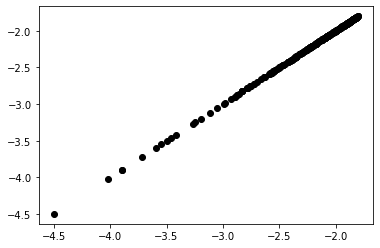

In [68]:
pd.DataFrame({'y_test': y_test ,'predict':linear.predict(x_test)})

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(y_test, output, 'o', color='black');





### Experiment 2 : With feature reduction

In [0]:
from sklearn.decomposition import PCA

In [70]:
corr_matrix = df.corr()
corr_matrix["Log"].sort_values(ascending=False)

Log                      1.000000
Receptor4_Log            0.541088
Receptor2_Log            0.538184
Receptor1_Log            0.491149
Receptor_measurement3    0.163330
Receptor_measurement1    0.163330
Receptor_measurement2    0.163321
Receptor_measurement4    0.163309
Receptor_measurement5    0.129704
Wind_speed_reci          0.012144
Source_Location_Y       -0.001092
Wind_speed              -0.002532
Wind_speed_sqr_log      -0.004210
Wind_speed_sqr_reci     -0.004540
Source_Location_X             NaN
Name: Log, dtype: float64

In [0]:
pca = PCA(n_components=6, whiten='True')
x = pca.fit(df_train).transform(df_train)

In [72]:
pca.explained_variance_

array([1.56383729e+04, 1.40782434e+02, 5.34950282e+00, 9.82063589e-01,
       3.91699080e-01, 9.52109852e-03])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,df_target,test_size=0.3, random_state=2)

In [0]:
linear=LinearRegression(normalize=False)

In [75]:
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
mean_squared_error(y_test,linear.predict(x_test))

0.0010272458106578473

In [77]:
r2_score(y_test,linear.predict(x_test))

0.9942678333664396

In [78]:
pd.DataFrame({'y_test': y_test ,'predict':linear.predict(x_test)})

,y_test,predict
665,-2.206552,-2.218338
1161,-2.243531,-2.239172
1551,-2.083836,-2.079895
877,-2.826697,-2.835221
1040,-1.896744,-1.898226
...,...,...
146,-2.349586,-2.328219
1317,-2.015932,-2.021217
824,-2.122231,-2.132734
1504,-2.045487,-2.046656


## 3. After normalizing

In [0]:
df_target=df.Log
df_train = df.loc[:, df.columns != 'Log']

In [0]:
df_norm = (df_train - df_train.mean()) / (df_train.max() - df_train.min())

In [81]:
df_norm

,Receptor_measurement1,Receptor1_Log,Receptor_measurement2,Receptor2_Log,Receptor_measurement3,Receptor_measurement4,Receptor4_Log,Receptor_measurement5,Wind_speed,Wind_speed_reci,Wind_speed_sqr_reci,Wind_speed_sqr_log,Source_Location_X,Source_Location_Y
0,-0.037274,-0.016682,-0.037278,-0.037547,-0.037273,-0.037286,-0.037693,-0.010820,0.063669,-0.094568,-0.013871,0.111206,NaN,-0.002813
1,-0.037594,-0.020832,-0.037599,-0.046140,-0.037593,-0.037606,-0.046167,-0.010905,-0.094226,-0.065328,-0.171766,0.015176,NaN,-0.002813
2,-0.036481,-0.007956,-0.036485,-0.019496,-0.036480,-0.036493,-0.019802,-0.010612,0.168932,-0.107099,0.116455,0.162663,NaN,-0.002813
3,0.013823,0.095339,0.013818,0.194216,0.013823,0.013811,0.193004,0.002612,-0.357384,0.080870,-0.334673,-0.255519,NaN,-0.002813
4,-0.035631,-0.000342,-0.035635,-0.003746,-0.035630,-0.035643,-0.004736,-0.010388,-0.041594,-0.077024,-0.124147,0.050346,NaN,-0.002813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,0.091913,0.130678,0.091912,0.267333,0.091916,0.091905,0.265509,0.023144,-0.462647,0.344028,-0.364748,-0.486898,NaN,-0.002813
1603,-0.037483,-0.019343,-0.037487,-0.043060,-0.037482,-0.037495,-0.043343,-0.010875,0.326827,-0.120368,0.349538,0.227474,NaN,-0.002813
1604,-0.038382,-0.033384,-0.038386,-0.072106,-0.038381,-0.038394,-0.072533,-0.011112,0.326827,-0.120368,0.349538,0.227474,NaN,-0.002813
1605,-0.035740,-0.001243,-0.035744,-0.005607,-0.035739,-0.035752,-0.006619,-0.010418,-0.199489,-0.031911,-0.251966,-0.068715,NaN,-0.002813


In [0]:
pca = PCA(n_components=6, whiten='True')
df_pca = pca.fit(df_train).transform(df_train)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_norm,df_target,test_size=0.2, random_state=4)

In [0]:
#linear=LinearRegression(normalize=True)

In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
from sklearn.svm import SVR


In [0]:
nn=MLPRegressor(hidden_layer_sizes=(8,),
                                       activation='relu',
                                       solver='adam',
                                       learning_rate='constant',
                                       learning_rate_init=0.01,
                                       alpha=0.01)

In [88]:
nn.fit(x_train,y_train)

ValueError: ignored

In [0]:
mean_squared_error(y_test,output)

In [0]:
y_test

In [0]:

output

In [0]:
r2_score(y_test,output)

In [0]:
pd.DataFrame({'y_test': y_test ,'predict':nn.predict(x_test)})

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(y_test, output, 'o', color='black');